<a href="https://colab.research.google.com/github/himanshusingh38/data-science-projects/blob/main/2_Image_Classification_Develop_a_convolutional_neural_network_(CNN)_to_classify_images_in_the_Fashion_MNIST_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist


In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
import gzip
import numpy as np

def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(16)  # Skip the header
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(-1, 28, 28)

def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(8)  # Skip the header
        return np.frombuffer(f.read(), dtype=np.uint8)

# Update these paths as per your file location
x_test = load_images('/content/t10k-labels-idx1-ubyte.gz')
y_test = load_labels('/content/t10k-images-idx3-ubyte.gz')



ValueError: cannot reshape array of size 9992 into shape (28,28)

In [8]:
# Correctly load image and label files
x_test = load_images('/content/t10k-images-idx3-ubyte.gz')    # Image file
y_test = load_labels('/content/t10k-labels-idx1-ubyte.gz')    # Label file


In [9]:
# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9038 - loss: 0.2592 - val_accuracy: 0.9001 - val_loss: 0.2778
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9183 - loss: 0.2208 - val_accuracy: 0.8954 - val_loss: 0.2844
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9303 - loss: 0.1924 - val_accuracy: 0.9077 - val_loss: 0.2636
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9357 - loss: 0.1731 - val_accuracy: 0.9086 - val_loss: 0.2614
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9443 - loss: 0.1510 - val_accuracy: 0.9133 - val_loss: 0.2530
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9505 - loss: 0.1339 - val_accuracy: 0.9162 - val_loss: 0.2698
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9578 - loss: 0.1141 - val_accuracy: 0.9160 - val_loss: 0.2809
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9596 -

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 - 2s - 7ms/step - accuracy: 0.9015 - loss: 0.3591

Test Accuracy: 0.9015


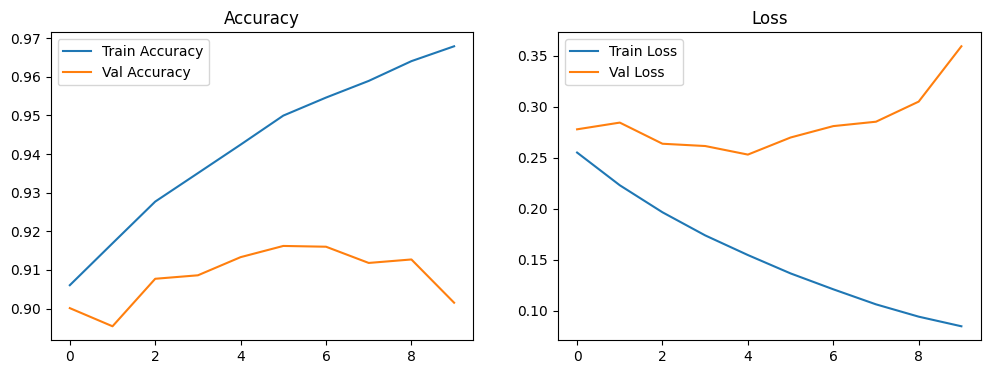

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


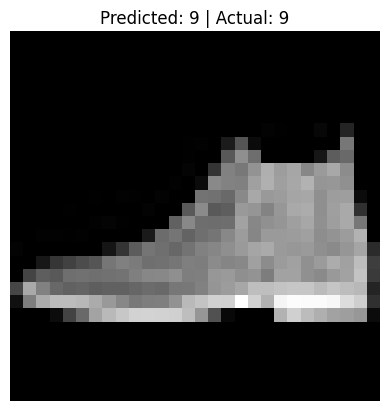

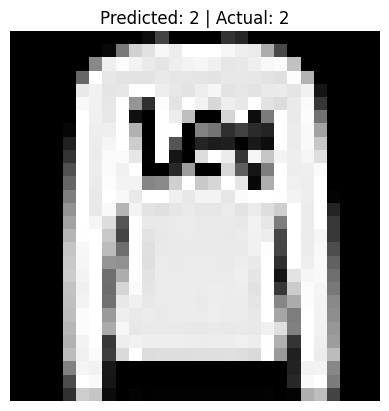

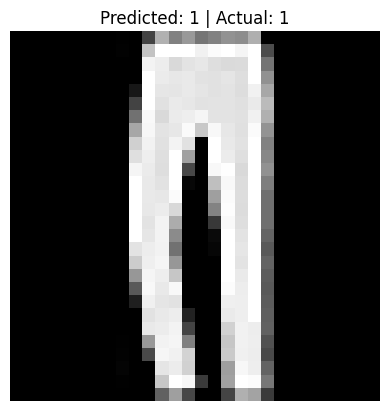

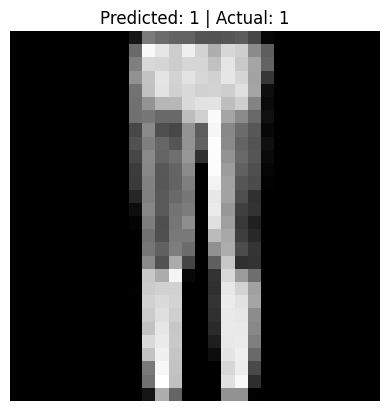

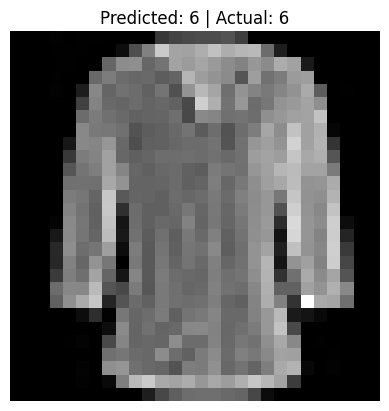

In [16]:
# Predict a few images
predictions = model.predict(x_test[:5])

# Show predictions with images
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} | Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()
